In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_auc_score
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, HuberRegressor, PoissonRegressor, GammaRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
diam_data = pd.read_csv('diamonds.csv', encoding='utf-8')
diam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   price    50000 non-null  int64  
 7   x        50000 non-null  float64
 8   y        50000 non-null  float64
 9   z        50000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


In [3]:
diam_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
diam_data.describe()

,carat,depth,table,price,x,y,z
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.799444,61.753006,57.457830,3944.805440,5.734403,5.737956,3.541056
std,0.475173,1.431088,2.232092,3997.938105,1.123077,1.145579,0.707065
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2410.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5351.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
diam_data['cut'].value_counts()

cut
Ideal        19938
Premium      12806
Very Good    11204
Good          4557
Fair          1495
Name: count, dtype: int64

In [6]:
diam_data['color'].value_counts()

color
G    10452
E     9085
F     8864
H     7711
D     6224
I     5058
J     2606
Name: count, dtype: int64

In [7]:
diam_data['clarity'].value_counts()

clarity
SI1     12115
VS2     11404
SI2      8519
VS1      7579
VVS2     4694
VVS1     3369
IF       1632
I1        688
Name: count, dtype: int64

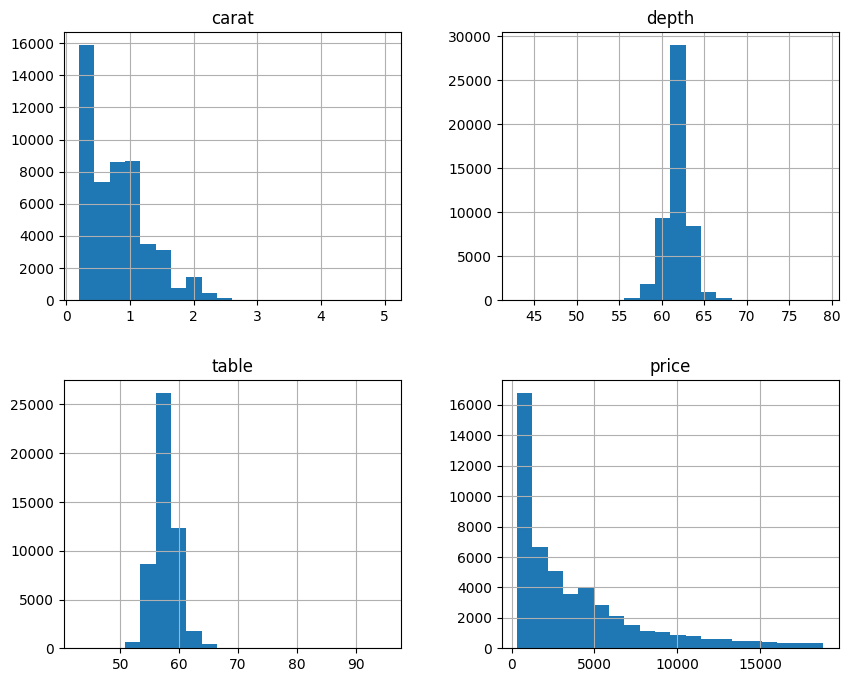

In [8]:
diam_data[['carat', 'depth', 'table', 'price']].hist(bins=20, figsize=(10, 8))
plt.show()

In [9]:
cut_mapping = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
color_mapping = {'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7}
clarity_mapping = {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}

diam_data['cut'] = diam_data['cut'].map(cut_mapping)
diam_data['color'] = diam_data['color'].map(color_mapping)
diam_data['clarity'] = diam_data['clarity'].map(clarity_mapping)

In [10]:
diam_data['depth_ratio'] = diam_data['z'] / ((diam_data['x'] + diam_data['y']) / 2)
diam_data['volume'] = diam_data['x'] * diam_data['y'] * diam_data['z']


In [11]:
problem_rows = diam_data[(diam_data['x'] + diam_data['y']) / 2 == 0]
problem_rows

,carat,cut,color,clarity,depth,table,price,x,y,z,depth_ratio,volume
11038,1.00,3,3,4,63.3,53.0,5139,0.0,0.0,0.0,NaN,0.0
14731,1.14,1,4,5,57.5,67.0,6381,0.0,0.0,0.0,NaN,0.0
22721,1.56,5,4,4,62.2,54.0,12800,0.0,0.0,0.0,NaN,0.0
24336,1.20,4,7,7,62.1,59.0,15686,0.0,0.0,0.0,NaN,0.0
25439,2.25,4,3,2,62.8,59.0,18034,0.0,0.0,0.0,NaN,0.0
45910,0.71,2,5,2,64.1,60.0,2130,0.0,0.0,0.0,NaN,0.0


In [12]:
diam_data['depth_ratio'] = diam_data['depth_ratio'].fillna(0)
diam_data['depth_ratio'].isna().sum()

np.int64(0)

In [13]:
focal_points = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
diam_data['focal_point'] = diam_data['carat'].apply(lambda x: 1 if x in focal_points else 0)
diam_data['focal_point'].value_counts()


focal_point
0    46375
1     3625
Name: count, dtype: int64

In [14]:
diam_data.isna().sum()

carat          0
cut            0
color          0
clarity        0
depth          0
table          0
price          0
x              0
y              0
z              0
depth_ratio    0
volume         0
focal_point    0
dtype: int64

In [15]:
focal_points = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
selected_categories = pd.DataFrame()
for point in focal_points:
    less_than = diam_data[(diam_data['carat'] < point) & (diam_data['carat'] >= point - 0.1)].copy()
    equal_to = diam_data[diam_data['carat'] == point].copy()
    greater_than = diam_data[(diam_data['carat'] > point) & (diam_data['carat'] <= point + 0.1)].copy()

    less_than['carat_class'] = 'less_than_focal'
    equal_to['carat_class'] = 'equal_to_focal'
    greater_than['carat_class'] = 'greater_than_focal'
    selected_categories = pd.concat([selected_categories, less_than, equal_to, greater_than], ignore_index=True)

selected_categories.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,depth_ratio,volume,focal_point,carat_class
0,0.42,4,2,2,61.5,59.0,552,4.78,4.84,2.96,0.615385,68.480192,0,less_than_focal
1,0.43,3,6,1,58.4,62.0,555,4.94,5.00,2.90,0.583501,71.630000,0,less_than_focal
2,0.41,5,2,3,61.7,55.0,561,4.77,4.80,2.95,0.616510,67.543200,0,less_than_focal
3,0.40,2,3,2,63.7,59.0,561,4.64,4.69,2.97,0.636656,64.631952,0,less_than_focal
4,0.40,2,3,2,63.8,57.0,561,4.67,4.70,2.99,0.638207,65.627510,0,less_than_focal


In [16]:
selected_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24576 entries, 0 to 24575
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   carat        24576 non-null  float64
 1   cut          24576 non-null  int64  
 2   color        24576 non-null  int64  
 3   clarity      24576 non-null  int64  
 4   depth        24576 non-null  float64
 5   table        24576 non-null  float64
 6   price        24576 non-null  int64  
 7   x            24576 non-null  float64
 8   y            24576 non-null  float64
 9   z            24576 non-null  float64
 10  depth_ratio  24576 non-null  float64
 11  volume       24576 non-null  float64
 12  focal_point  24576 non-null  int64  
 13  carat_class  24576 non-null  object 
dtypes: float64(8), int64(5), object(1)
memory usage: 2.6+ MB


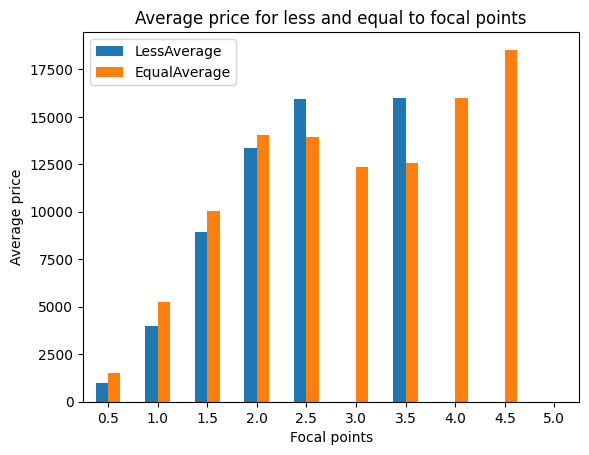

In [17]:
focal_analysis_Less_Egual = []

for point in focal_points:
    less_than = selected_categories[(selected_categories['carat'] < point) & (selected_categories['carat'] >= point - 0.1)]
    equal_to = selected_categories[selected_categories['carat'] == point]

    less_avg = less_than['price'].mean() if not less_than.empty else 0
    equal_avg = equal_to['price'].mean() if not equal_to.empty else 0
        
    focal_analysis_Less_Egual.append({
        'FocalPoint': point,
        'LessAverage': less_avg,
        'EqualAverage': equal_avg    
    })

focal_analysis_Less_Egual_data = pd.DataFrame(focal_analysis_Less_Egual)

focal_analysis_Less_Egual_data.set_index('FocalPoint')[['LessAverage', 'EqualAverage']].plot(kind='bar')
plt.title('Average price for less and equal to focal points')
plt.xlabel('Focal points')
plt.ylabel('Average price')
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.show()


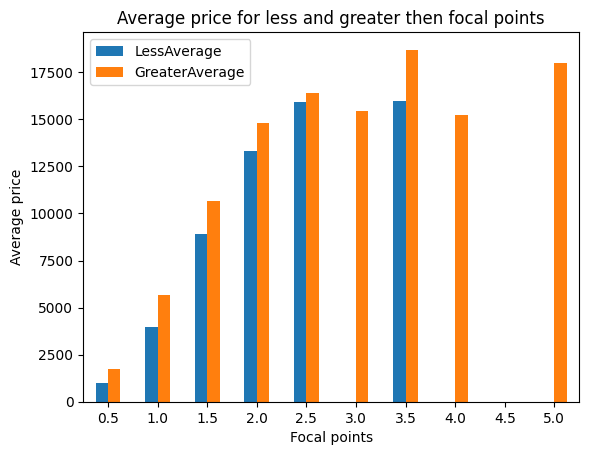

In [18]:
focal_analysis_Less_Greater = []

for point in focal_points:
    less_than = selected_categories[(selected_categories['carat'] < point) & (selected_categories['carat'] >= point - 0.1)]
    greater_than = diam_data[(diam_data['carat'] > point) & (diam_data['carat'] <= point + 0.1)]
    
    less_avg = less_than['price'].mean() if not less_than.empty else 0
    greater_avg = greater_than['price'].mean() if not greater_than.empty else np.nan
    
    focal_analysis_Less_Greater.append({
        'FocalPoint': point,
        'LessAverage': less_avg,
        'GreaterAverage': greater_avg
    })

focal_analysis_Less_Greater_data = pd.DataFrame(focal_analysis_Less_Greater)

focal_analysis_Less_Greater_data.set_index('FocalPoint')[['LessAverage', 'GreaterAverage']].plot(kind='bar')
plt.title('Average price for less and greater then focal points')
plt.xlabel('Focal points')
plt.ylabel('Average price')
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.show()


In [19]:
focal_analysis_difference_LessEqual = []

for point in focal_points:
    less_than = diam_data[(diam_data['carat'] < point) & (diam_data['carat'] >= point - 0.1)]
    equal_to = diam_data[diam_data['carat'] == point]
    
    less_avg = less_than['price'].mean() if not less_than.empty else np.nan
    equal_avg = equal_to['price'].mean() if not equal_to.empty else np.nan
    
    focal_analysis_difference_LessEqual.append({
        'FocalPoint': point,
        'LessFocal': less_avg,
        'EqualFocal': equal_avg,
        'DifferenceLE': (equal_avg - less_avg) if not np.isnan(less_avg) and not np.isnan(equal_avg) else np.nan
    })

focal_analysis_difference_LessEqual_data = pd.DataFrame(focal_analysis_difference_LessEqual)



In [20]:
focal_analysis_difference_LessEqual_data

,FocalPoint,LessFocal,EqualFocal,DifferenceLE
0,0.5,998.606832,1502.457904,503.851072
1,1.0,3962.526398,5253.937238,1291.410841
2,1.5,8921.157635,10030.695187,1109.537552
3,2.0,13332.187500,14049.936759,717.749259
4,2.5,15913.160714,13954.600000,-1958.560714
5,3.0,NaN,12378.500000,NaN
6,3.5,15964.000000,12587.000000,-3377.000000
7,4.0,NaN,15984.000000,NaN
8,4.5,NaN,18531.000000,NaN
9,5.0,NaN,NaN,NaN


In [21]:
focal_analysis_difference_0201 = []

for point in focal_points:
    focal_minus_0_2 = diam_data[(diam_data['carat'] < point - 0.1) & (diam_data['carat'] >= point - 0.2)]
    focal_minus_0_1 = diam_data[(diam_data['carat'] < point) & (diam_data['carat'] >= point - 0.1)]
    minus_0_2_avg = focal_minus_0_2['price'].mean() if not focal_minus_0_2.empty else np.nan
    minus_0_1_avg = focal_minus_0_1['price'].mean() if not focal_minus_0_1.empty else np.nan

    price_difference = (minus_0_1_avg - minus_0_2_avg) if not np.isnan(minus_0_1_avg) and not np.isnan(minus_0_2_avg) else np.nan
    
    # Добавляем результаты в список
    focal_analysis_difference_0201.append({
        'FocalPoint': point,
        '0_2_avg': minus_0_2_avg,
        '0_1_avg': minus_0_1_avg,
        'PriceDifference_0201': price_difference
    })


focal_analysis_difference_0201_data = pd.DataFrame(focal_analysis_difference_0201)


In [22]:
focal_analysis_difference_0201_data

,FocalPoint,0_2_avg,0_1_avg,PriceDifference_0201
0,0.5,744.297638,998.606832,254.309193
1,1.0,3170.498361,3962.526398,792.028037
2,1.5,7766.802360,8921.157635,1154.355276
3,2.0,12530.758621,13332.187500,801.428879
4,2.5,15373.473118,15913.160714,539.687596
5,3.0,16909.000000,NaN,NaN
6,3.5,NaN,15964.000000,NaN
7,4.0,NaN,NaN,NaN
8,4.5,NaN,NaN,NaN
9,5.0,NaN,NaN,NaN


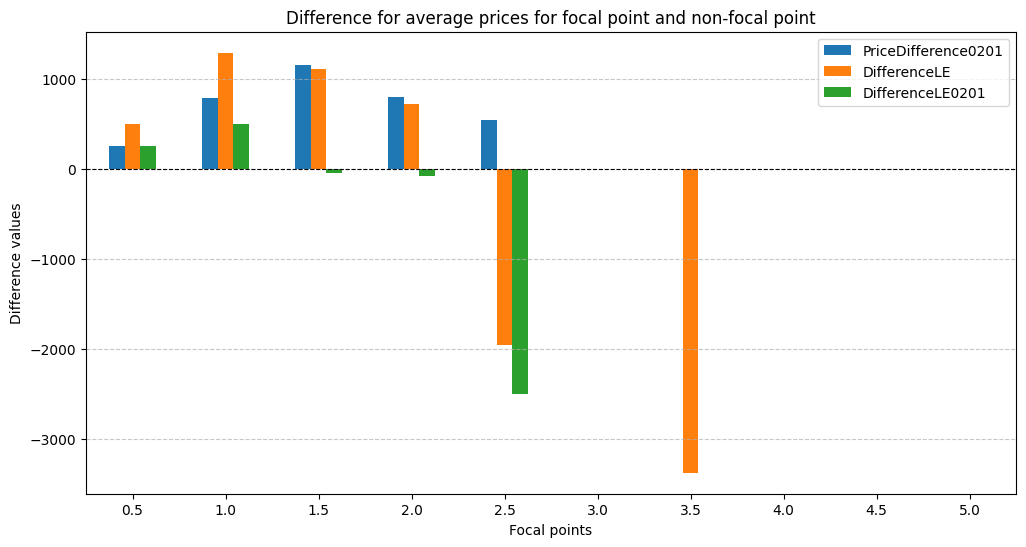

In [23]:
comparison_data_LE_0201 = pd.DataFrame({
    'FocalPoint': focal_analysis_difference_LessEqual_data['FocalPoint'],  # FocalPoint из первого DataFrame
    'DifferenceLE': focal_analysis_difference_LessEqual_data['DifferenceLE'],  # DifferenceLE из focal_analysis_df
    'PriceDifference0201': focal_analysis_difference_0201_data['PriceDifference_0201']  # PriceDifference из focal_difference_df
})

comparison_data_LE_0201_data = pd.DataFrame(comparison_data_LE_0201)
comparison_data_LE_0201_data['DifferenceLE0201'] = comparison_data_LE_0201_data['DifferenceLE'] - comparison_data_LE_0201_data['PriceDifference0201']

comparison_data_LE_0201_data.set_index('FocalPoint')[['PriceDifference0201', 'DifferenceLE', 'DifferenceLE0201']].plot(kind='bar', figsize=(12, 6))
plt.title('Difference for average prices for focal point and non-focal point')
plt.xlabel('Focal points')
plt.ylabel('Difference values')
plt.xticks(rotation=0)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [49]:
comparison_data_LE_0201_data

,FocalPoint,DifferenceLE,PriceDifference0201,DifferenceLE0201
0,0.5,503.851072,254.309193,249.541879
1,1.0,1291.410841,792.028037,499.382804
2,1.5,1109.537552,1154.355276,-44.817724
3,2.0,717.749259,801.428879,-83.679620
4,2.5,-1958.560714,539.687596,-2498.248310
5,3.0,NaN,NaN,NaN
6,3.5,-3377.000000,NaN,NaN
7,4.0,NaN,NaN,NaN
8,4.5,NaN,NaN,NaN
9,5.0,NaN,NaN,NaN


In [24]:
focal_analysis_difference_LessGreater = []

for point in focal_points:
    less_than = diam_data[(diam_data['carat'] < point) & (diam_data['carat'] >= point - 0.1)]
    greater_than = diam_data[(diam_data['carat'] > point) & (diam_data['carat'] <= point + 0.1)]

    less_avg = less_than['price'].mean() if not less_than.empty else np.nan
    greater_avg = greater_than['price'].mean() if not greater_than.empty else np.nan

    focal_analysis_difference_LessGreater.append({
        'FocalPoint': point,
        'LessFocal': less_avg,
        'GreaterFocal': greater_avg,
        'DifferenceLG': (greater_avg - less_avg) if not np.isnan(less_avg) and not np.isnan(greater_avg) else np.nan
    })

focal_analysis_difference_LessGreater_data = pd.DataFrame(focal_analysis_difference_LessGreater)





In [25]:
focal_analysis_difference_LessGreater_data

,FocalPoint,LessFocal,GreaterFocal,DifferenceLG
0,0.5,998.606832,1718.538492,719.931660
1,1.0,3962.526398,5678.310425,1715.784028
2,1.5,8921.157635,10652.876482,1731.718847
3,2.0,13332.187500,14802.949533,1470.762033
4,2.5,15913.160714,16401.518519,488.357804
5,3.0,NaN,15427.055556,NaN
6,3.5,15964.000000,18701.000000,2737.000000
7,4.0,NaN,15223.000000,NaN
8,4.5,NaN,NaN,NaN
9,5.0,NaN,18018.000000,NaN


In [26]:
focal_analysis_difference_0301 = []

for point in focal_points:
    focal_minus_0_3 = diam_data[(diam_data['carat'] < point - 0.2) & (diam_data['carat'] >= point - 0.3)]
    focal_minus_0_1 = diam_data[(diam_data['carat'] < point) & (diam_data['carat'] >= point - 0.1)]
    
    minus_0_3_avg = focal_minus_0_3['price'].mean() if not focal_minus_0_3.empty else np.nan
    minus_0_1_avg = focal_minus_0_1['price'].mean() if not focal_minus_0_1.empty else np.nan
    
    price_difference = (minus_0_1_avg - minus_0_3_avg) if not np.isnan(minus_0_1_avg) and not np.isnan(minus_0_3_avg) else np.nan
    
    focal_analysis_difference_0301.append({
        'FocalPoint': point,
        '0_3_avg': minus_0_3_avg,
        '0_1_avg': minus_0_1_avg,
        'PriceDifference_0301': price_difference
    })

focal_analysis_difference_0301_data = pd.DataFrame(focal_analysis_difference_0301)


In [27]:
focal_analysis_difference_0301_data

,FocalPoint,0_3_avg,0_1_avg,PriceDifference_0301
0,0.5,539.761549,998.606832,458.845283
1,1.0,2677.568847,3962.526398,1284.957550
2,1.5,7031.041718,8921.157635,1890.115917
3,2.0,12194.828319,13332.187500,1137.359181
4,2.5,14953.585635,15913.160714,959.575079
5,3.0,14035.777778,NaN,NaN
6,3.5,12422.500000,15964.000000,3541.500000
7,4.0,NaN,NaN,NaN
8,4.5,NaN,NaN,NaN
9,5.0,NaN,NaN,NaN


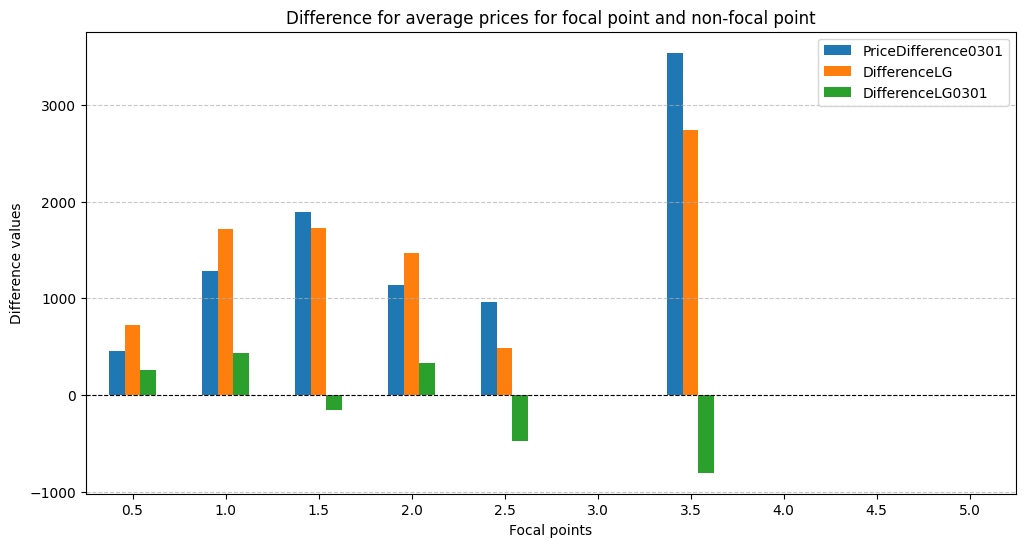

In [28]:
comparison_data_LG_0301 = pd.DataFrame({
    'FocalPoint': focal_analysis_difference_LessGreater_data['FocalPoint'],  # FocalPoint из первого DataFrame
    'DifferenceLG': focal_analysis_difference_LessGreater_data['DifferenceLG'],  # DifferenceLE из focal_analysis_df
    'PriceDifference0301': focal_analysis_difference_0301_data['PriceDifference_0301']  # PriceDifference из focal_difference_df
})

comparison_data_LG_0301_data = pd.DataFrame(comparison_data_LG_0301)
comparison_data_LG_0301_data['DifferenceLG0301'] = comparison_data_LG_0301_data['DifferenceLG'] - comparison_data_LG_0301_data['PriceDifference0301']

comparison_data_LG_0301_data.set_index('FocalPoint')[['PriceDifference0301', 'DifferenceLG', 'DifferenceLG0301']].plot(kind='bar', figsize=(12, 6))
plt.title('Difference for average prices for focal point and non-focal point')
plt.xlabel('Focal points')
plt.ylabel('Difference values')
plt.xticks(rotation=0)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [29]:
comparison_data_LG_0301_data

,FocalPoint,DifferenceLG,PriceDifference0301,DifferenceLG0301
0,0.5,719.931660,458.845283,261.086378
1,1.0,1715.784028,1284.957550,430.826477
2,1.5,1731.718847,1890.115917,-158.397070
3,2.0,1470.762033,1137.359181,333.402851
4,2.5,488.357804,959.575079,-471.217275
5,3.0,NaN,NaN,NaN
6,3.5,2737.000000,3541.500000,-804.500000
7,4.0,NaN,NaN,NaN
8,4.5,NaN,NaN,NaN
9,5.0,NaN,NaN,NaN


In [30]:
selected_categories_encoded = pd.get_dummies(selected_categories, columns=['carat_class'])

In [31]:
selected_categories_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24576 entries, 0 to 24575
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   carat                           24576 non-null  float64
 1   cut                             24576 non-null  int64  
 2   color                           24576 non-null  int64  
 3   clarity                         24576 non-null  int64  
 4   depth                           24576 non-null  float64
 5   table                           24576 non-null  float64
 6   price                           24576 non-null  int64  
 7   x                               24576 non-null  float64
 8   y                               24576 non-null  float64
 9   z                               24576 non-null  float64
 10  depth_ratio                     24576 non-null  float64
 11  volume                          24576 non-null  float64
 12  focal_point                     

In [ ]:
# RESULTS for modeling!!!!!

In [32]:
X = selected_categories_encoded.drop(columns=['price'])
y = selected_categories_encoded['price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

models = [
    ('Linear Regression', LinearRegression()),
    ('Polynomial Regression (Degree 2)', PolynomialFeatures(degree=2)),
    ('Ridge Regression', Ridge(alpha=1.0)),
    ('Lasso Regression', Lasso(alpha=0.01)),
    ('Elastic Net Regression', ElasticNet(alpha=0.01)),
    ('Support Vector Regression', SVR(kernel='rbf', C=100)),
    ('k-Nearest Neighbors Regression', KNeighborsRegressor(n_neighbors=5)),
    ('Decision Trees', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('AdaBoost Regression', AdaBoostRegressor(n_estimators=100, random_state=42)),
    ('Gradient Boosting Regression', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('XGBoost Regression', XGBRegressor(n_estimators=100, random_state=42, verbosity=0)),
    ('LightGBM Regression', LGBMRegressor(random_state=42)),
    ('Bayesian Regression', BayesianRidge()),
    ('Robust Regression', HuberRegressor(max_iter=1000)),
    ('Poisson Regression', PoissonRegressor(alpha=0.01, max_iter=1000)),
    ('Gamma Regression', GammaRegressor(alpha=0.01, max_iter=1000))
]
results = []

for name, model in models:
    try:
        if name == 'Polynomial Regression (Degree 2)':
            poly = PolynomialFeatures(degree=2)
            X_train_poly = poly.fit_transform(X_train)
            X_test_poly = poly.transform(X_test)
            lin_reg = LinearRegression()
            lin_reg.fit(X_train_poly, y_train)
            y_pred = lin_reg.predict(X_test_poly)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
        
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        results.append({'Model': name, 'MSE': mse, 'R2': r2})
    except Exception as e:
        results.append({'Model': name, 'MSE': 'Error', 'R2': 'Error'})

results_df = pd.DataFrame(results)

results_df = results_df.sort_values(by='R2', ascending=False)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000704 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1626
[LightGBM] [Info] Number of data points in the train set: 19660, number of used features: 15
[LightGBM] [Info] Start training from score 4779.624110


In [33]:
results_df

,Model,MSE,R2
12,LightGBM Regression,3.410759e+05,0.981137
8,Random Forest,3.587156e+05,0.980162
11,XGBoost Regression,3.710284e+05,0.979481
10,Gradient Boosting Regression,4.301439e+05,0.976211
1,Polynomial Regression (Degree 2),6.233960e+05,0.965524
7,Decision Trees,6.766764e+05,0.962577
6,k-Nearest Neighbors Regression,6.778416e+05,0.962513
5,Support Vector Regression,7.661684e+05,0.957628
15,Poisson Regression,9.386960e+05,0.948087
0,Linear Regression,1.591350e+06,0.911992


In [34]:
X_without_carat_focal = selected_categories_encoded.drop(columns=['price', 'carat_class_less_than_focal', 'carat_class_equal_to_focal', 'carat_class_greater_than_focal', 'focal_point'])
y = selected_categories_encoded['price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_without_carat_focal)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
models = [
    ('Linear Regression', LinearRegression()),
    ('Polynomial Regression (Degree 2)', PolynomialFeatures(degree=2)),
    ('Ridge Regression', Ridge(alpha=1.0)),
    ('Lasso Regression', Lasso(alpha=0.01)),
    ('Elastic Net Regression', ElasticNet(alpha=0.01)),
    ('Support Vector Regression', SVR(kernel='rbf', C=100)),
    ('k-Nearest Neighbors Regression', KNeighborsRegressor(n_neighbors=5)),
    ('Decision Trees', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('AdaBoost Regression', AdaBoostRegressor(n_estimators=100, random_state=42)),
    ('Gradient Boosting Regression', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('XGBoost Regression', XGBRegressor(n_estimators=100, random_state=42, verbosity=0)),
    ('LightGBM Regression', LGBMRegressor(random_state=42)),
    ('Bayesian Regression', BayesianRidge()),
    ('Robust Regression', HuberRegressor(max_iter=1000)),
    ('Poisson Regression', PoissonRegressor(alpha=0.01, max_iter=1000)),
    ('Gamma Regression', GammaRegressor(alpha=0.01, max_iter=1000))
]
results = []

for name, model in models:
    try:
        if name == 'Polynomial Regression (Degree 2)':
            poly = PolynomialFeatures(degree=2)
            X_train_poly = poly.fit_transform(X_train)
            X_test_poly = poly.transform(X_test)
            lin_reg = LinearRegression()
            lin_reg.fit(X_train_poly, y_train)
            y_pred = lin_reg.predict(X_test_poly)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
        
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        results.append({'Model': name, 'MSE': mse, 'R2': r2})
    except Exception as e:
        results.append({'Model': name, 'MSE': 'Error', 'R2': 'Error'})

results_removed = pd.DataFrame(results)

results_removed = results_removed.sort_values(by='R2', ascending=False)



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000887 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1614
[LightGBM] [Info] Number of data points in the train set: 19660, number of used features: 11
[LightGBM] [Info] Start training from score 4779.624110


In [35]:
results_removed

,Model,MSE,R2
12,LightGBM Regression,3.389817e+05,0.981253
8,Random Forest,3.569171e+05,0.980261
11,XGBoost Regression,3.628847e+05,0.979931
10,Gradient Boosting Regression,4.302581e+05,0.976205
1,Polynomial Regression (Degree 2),6.342588e+05,0.964923
6,k-Nearest Neighbors Regression,6.764151e+05,0.962592
5,Support Vector Regression,6.900108e+05,0.961840
7,Decision Trees,6.932805e+05,0.961659
15,Poisson Regression,9.493130e+05,0.947499
9,AdaBoost Regression,1.543093e+06,0.914661


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000904 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1602
[LightGBM] [Info] Number of data points in the train set: 19660, number of used features: 11
[LightGBM] [Info] Start training from score 4779.624110


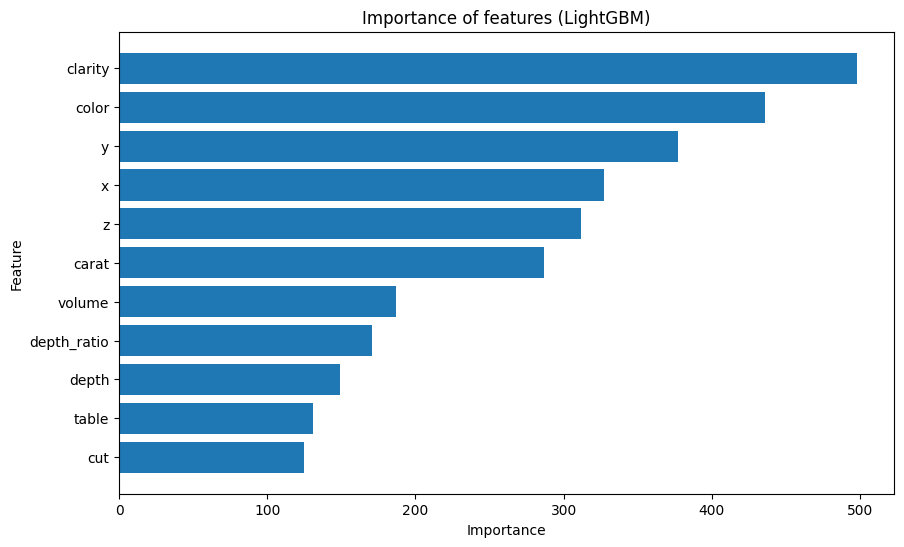

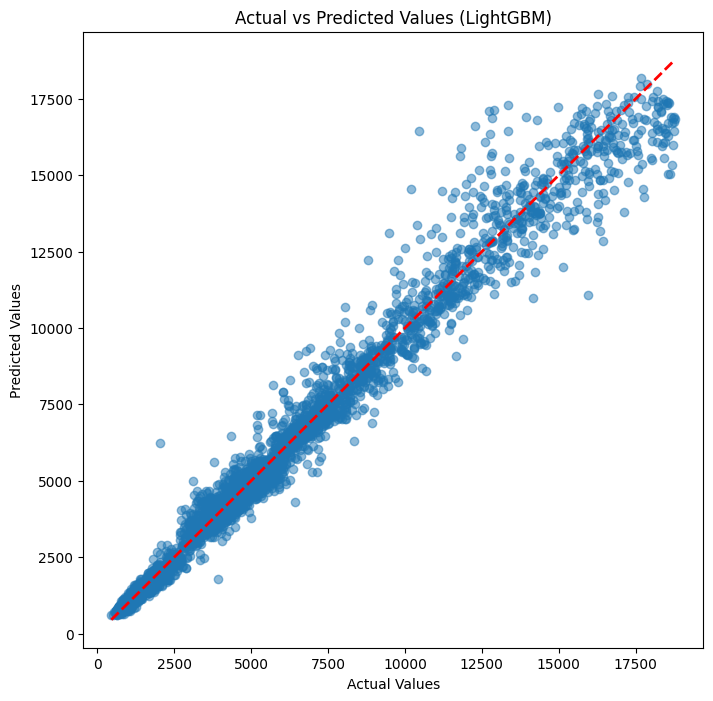

In [36]:
X = selected_categories_encoded.drop(columns=['price', 'carat_class_less_than_focal', 'carat_class_equal_to_focal', 'carat_class_greater_than_focal', 'focal_point'])
y = selected_categories_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_lgbm = LGBMRegressor(random_state=42, n_estimators=100)
model_lgbm.fit(X_train, y_train)

y_pred = model_lgbm.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model_lgbm.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.title('Importance of features (LightGBM)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Values (LightGBM)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


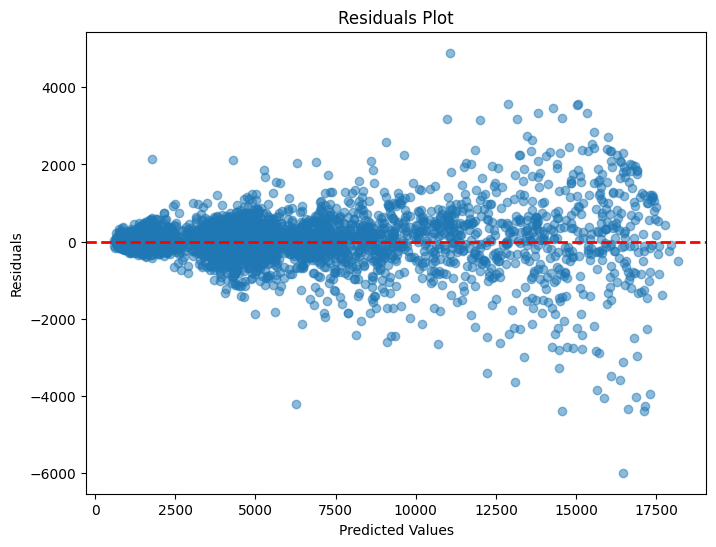

In [37]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


In [38]:
new_Alldata = pd.DataFrame(columns=diam_data.columns)
new_Alldata = diam_data.copy()
new_Alldata.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,depth_ratio,volume,focal_point
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43,0.612863,38.202030,0
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31,0.597671,34.505856,0
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31,0.568966,38.076885,0
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63,0.623962,46.724580,0
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75,0.632911,51.917250,0


In [39]:
X = new_Alldata.drop(columns=['price'])
y = new_Alldata['price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

models = [
    ('Linear Regression', LinearRegression()),
    ('Polynomial Regression (Degree 2)', PolynomialFeatures(degree=2)),
    ('Ridge Regression', Ridge(alpha=1.0)),
    ('Lasso Regression', Lasso(alpha=0.1, max_iter=5000)),
    ('Elastic Net Regression', ElasticNet(alpha=0.1, max_iter=5000)),
    ('Support Vector Regression', SVR(kernel='rbf', C=100)),
    ('k-Nearest Neighbors Regression', KNeighborsRegressor(n_neighbors=5)),
    ('Decision Trees', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('AdaBoost Regression', AdaBoostRegressor(n_estimators=100, random_state=42)),
    ('Gradient Boosting Regression', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('XGBoost Regression', XGBRegressor(n_estimators=100, random_state=42, verbosity=0)),
    ('LightGBM Regression', LGBMRegressor(random_state=42)),
    ('Bayesian Regression', BayesianRidge()),
    ('Robust Regression', HuberRegressor(max_iter=1000)),
    ('Poisson Regression', PoissonRegressor(alpha=0.01, max_iter=1000)),
    ('Gamma Regression', GammaRegressor(alpha=0.01, max_iter=1000))
]
results = []

for name, model in models:
    try:
        if name == 'Polynomial Regression (Degree 2)':
            poly = PolynomialFeatures(degree=2)
            X_train_poly = poly.fit_transform(X_train)
            X_test_poly = poly.transform(X_test)
            lin_reg = LinearRegression()
            lin_reg.fit(X_train_poly, y_train)
            y_pred = lin_reg.predict(X_test_poly)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
        
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        results.append({'Model': name, 'MSE': mse, 'R2': r2})
    except Exception as e:
        results.append({'Model': name, 'MSE': 'Error', 'R2': 'Error'})

results_df = pd.DataFrame(results)

results_df = results_df.sort_values(by='R2', ascending=False)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002145 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1796
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 12
[LightGBM] [Info] Start training from score 3958.315100


In [40]:
results_df

,Model,MSE,R2
11,XGBoost Regression,2.667317e+05,0.982743
12,LightGBM Regression,2.676021e+05,0.982687
8,Random Forest,2.788104e+05,0.981962
10,Gradient Boosting Regression,3.504631e+05,0.977326
6,k-Nearest Neighbors Regression,5.157109e+05,0.966635
5,Support Vector Regression,5.276645e+05,0.965862
7,Decision Trees,5.325271e+05,0.965547
15,Poisson Regression,6.591255e+05,0.957357
9,AdaBoost Regression,1.277566e+06,0.917346
3,Lasso Regression,2.072318e+06,0.865928


In [41]:
X = new_Alldata.drop(columns=['price', 'focal_point'])
y = new_Alldata['price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

models = [
    ('Linear Regression', LinearRegression()),
    ('Polynomial Regression (Degree 2)', PolynomialFeatures(degree=2)),
    ('Ridge Regression', Ridge(alpha=1.0)),
    ('Lasso Regression', Lasso(alpha=0.1, max_iter=5000)),
    ('Elastic Net Regression', ElasticNet(alpha=0.1, max_iter=5000)),
    ('Support Vector Regression', SVR(kernel='rbf', C=100)),
    ('k-Nearest Neighbors Regression', KNeighborsRegressor(n_neighbors=5)),
    ('Decision Trees', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('AdaBoost Regression', AdaBoostRegressor(n_estimators=100, random_state=42)),
    ('Gradient Boosting Regression', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('XGBoost Regression', XGBRegressor(n_estimators=100, random_state=42, verbosity=0)),
    ('LightGBM Regression', LGBMRegressor(random_state=42)),
    ('Bayesian Regression', BayesianRidge()),
    ('Robust Regression', HuberRegressor(max_iter=1000)),
    ('Poisson Regression', PoissonRegressor(alpha=0.01, max_iter=1000)),
    ('Gamma Regression', GammaRegressor(alpha=0.01, max_iter=1000))
]
results = []

for name, model in models:
    try:
        if name == 'Polynomial Regression (Degree 2)':
            poly = PolynomialFeatures(degree=2)
            X_train_poly = poly.fit_transform(X_train)
            X_test_poly = poly.transform(X_test)
            lin_reg = LinearRegression()
            lin_reg.fit(X_train_poly, y_train)
            y_pred = lin_reg.predict(X_test_poly)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
        
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        results.append({'Model': name, 'MSE': mse, 'R2': r2})
    except Exception as e:
        results.append({'Model': name, 'MSE': 'Error', 'R2': 'Error'})

results_df = pd.DataFrame(results)

results_df = results_df.sort_values(by='R2', ascending=False)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001850 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1793
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 11
[LightGBM] [Info] Start training from score 3958.315100


In [42]:
results_df

,Model,MSE,R2
12,LightGBM Regression,2.654704e+05,0.982825
11,XGBoost Regression,2.695454e+05,0.982561
8,Random Forest,2.793003e+05,0.981930
10,Gradient Boosting Regression,3.506716e+05,0.977313
5,Support Vector Regression,4.792605e+05,0.968994
6,k-Nearest Neighbors Regression,4.969247e+05,0.967851
7,Decision Trees,5.540426e+05,0.964155
15,Poisson Regression,6.580325e+05,0.957428
9,AdaBoost Regression,1.245199e+06,0.919440
3,Lasso Regression,2.039502e+06,0.868051


Mean Squared Error (MSE): 266731.721906262
R2 Score: 0.9827433824539185


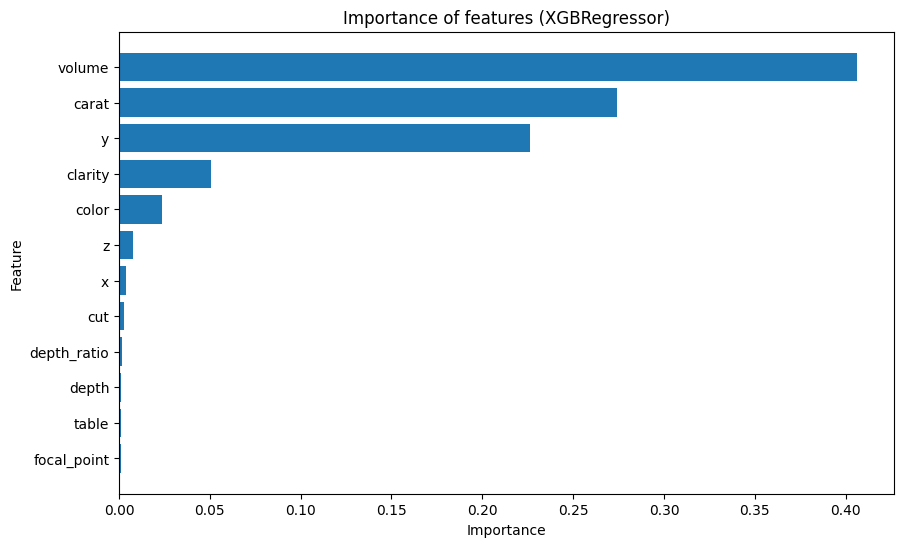

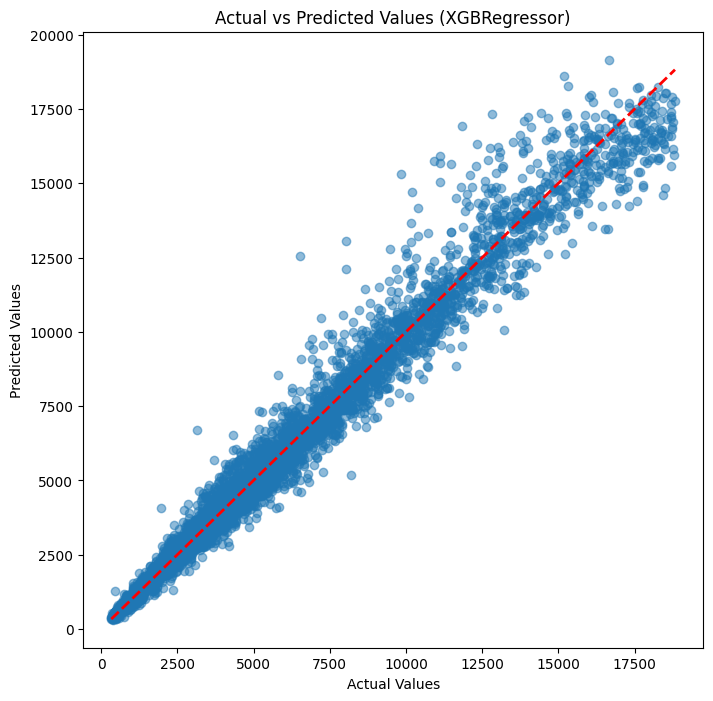

In [45]:
X = new_Alldata.drop(columns=['price'])
y = new_Alldata['price']

feature_names = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_xgb = XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R2 Score: {r2}")

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': model_xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.title('Importance of features (XGBRegressor)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Values (XGBRegressor)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

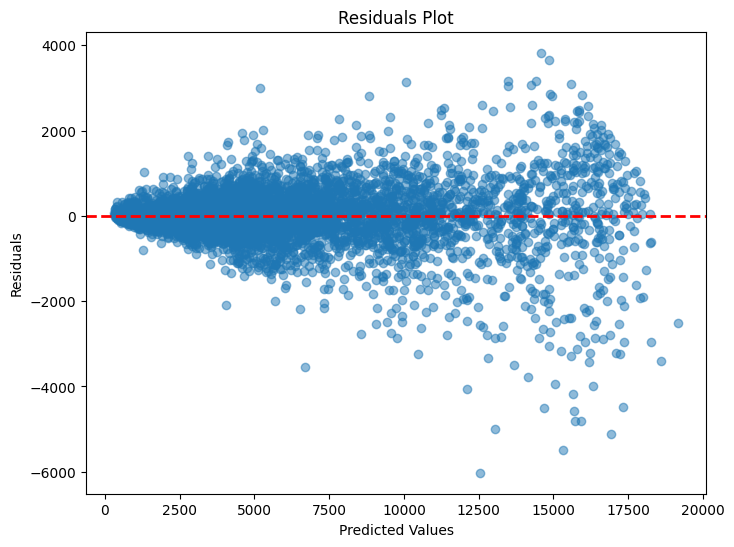

In [46]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000801 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1787
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 11
[LightGBM] [Info] Start training from score 3958.315100


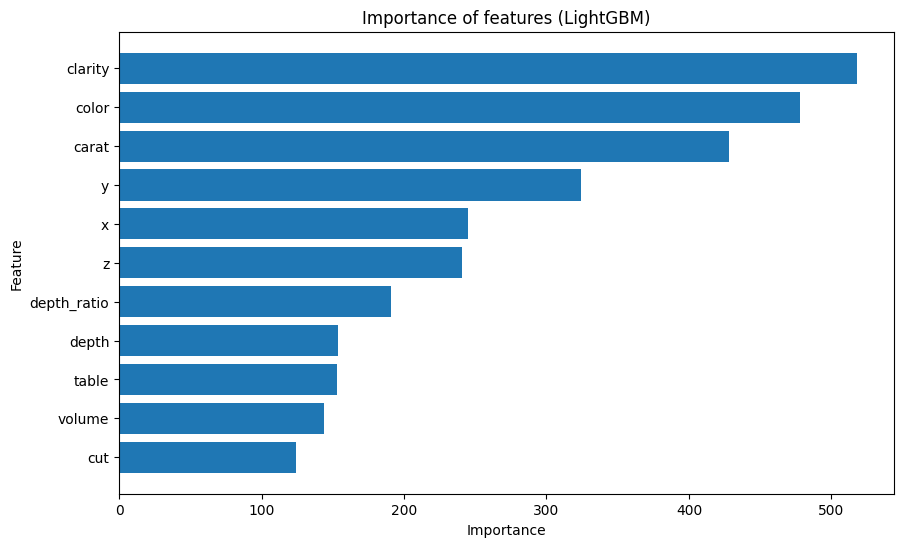

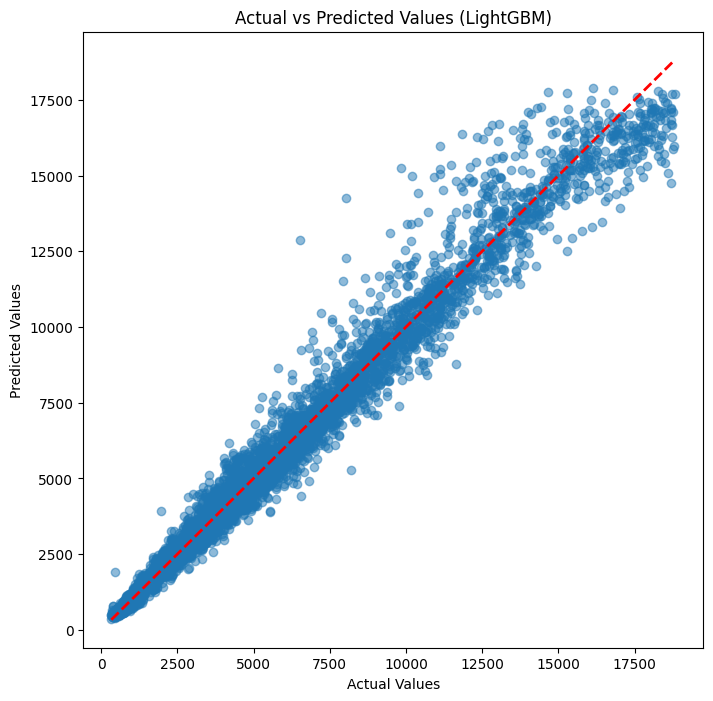

In [47]:
X = new_Alldata.drop(columns=['price', 'focal_point'])
y = new_Alldata['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_lgbm = LGBMRegressor(random_state=42, n_estimators=100)
model_lgbm.fit(X_train, y_train)

y_pred = model_lgbm.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model_lgbm.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.title('Importance of features (LightGBM)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Values (LightGBM)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


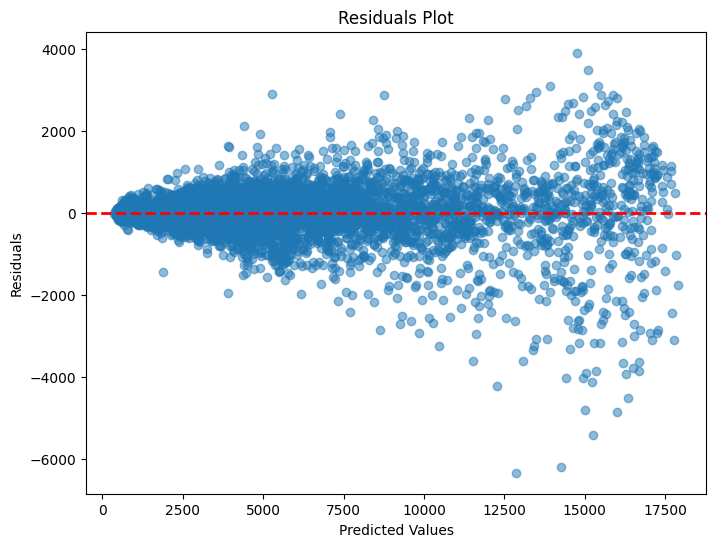

In [48]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()
